In [3]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

In [6]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

In [8]:
# Load the csv file
ds = pd.read_csv("usgs_earthquakes.csv")
# Check the data
ds

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [10]:
#1
# Plate Carree projection
ccrs.PlateCarree()

# Show more details of the Plate Carree projection
print(ccrs.PlateCarree())

# Check the projection
ccrs.PlateCarree?

+proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to_meter=111319.4907932736 +vto_meter=1 +no_defs +type=crs


Init signature: ccrs.PlateCarree(central_longitude=0.0, globe=None)
Docstring:     
The abstract class which denotes cylindrical projections where we
want to allow x values to wrap around.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           d:\python\lib\site-packages\cartopy\crs.py
Type:           ABCMeta
Subclasses:     

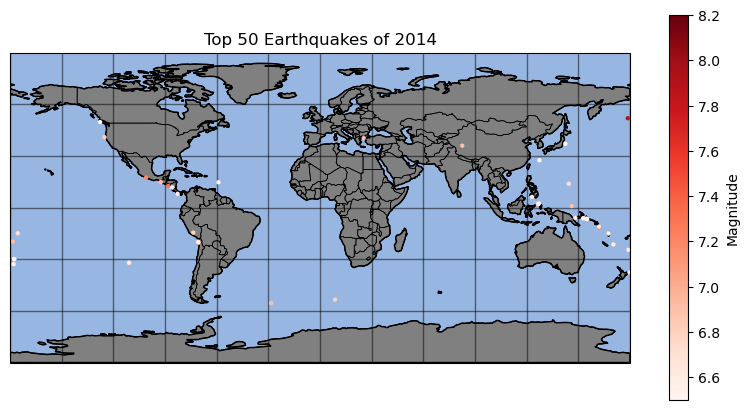

In [12]:
#1
#筛选出震级前50的地点
ds_top50 = ds.sort_values(by='mag', ascending=False).head(50)

# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=100)

# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add features to axes using cartopy.feature (cfeature)
ax.set_extent([-180, 180, -90, 90])

ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey', zorder=1)
# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.NaturalEarthFeature(category='physical',
                                           name='land',
                                           scale='110m',
                                           facecolor='gray',
                                           edgecolor='black',
                                           linewidth=1))

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)
# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,91,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 30))
#在底图上加上点位
sc = ax.scatter(ds_top50['longitude'],ds_top50['latitude'],c=ds_top50['mag'],cmap='Reds',s=10,edgecolor='none',zorder=2)
#说明点位颜色及比色卡
cbar = plt.colorbar(sc, orientation='vertical',shrink=0.5)
cbar.set_label('Magnitude')
#写出图的标题
ax.set_title('Top 50 Earthquakes of 2014')
#输出成图
plt.show()

In [14]:
#2使用第二次作业中第二题的文件NOAA_NCDC_ERSST_v3b_SST.nc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
# 加载netCDF文件
ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

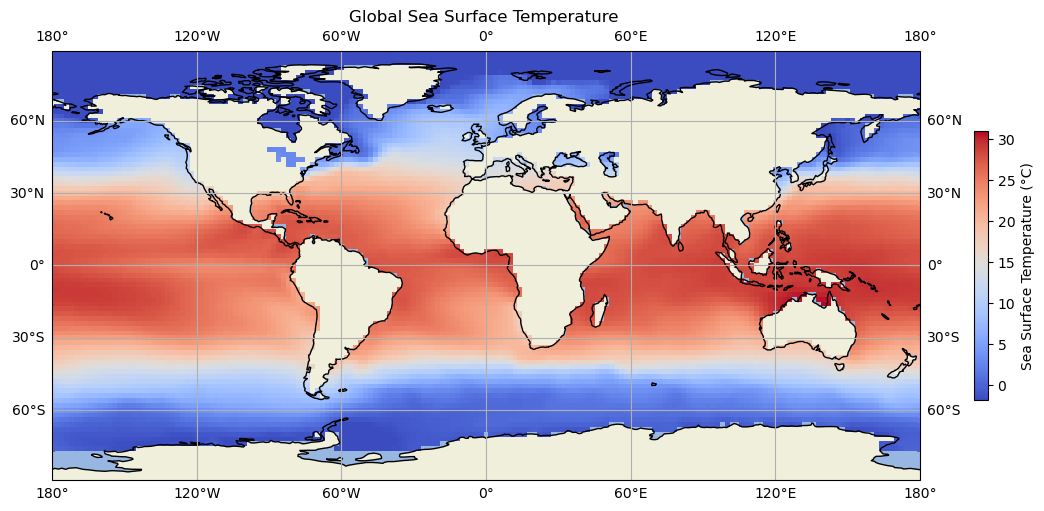

In [16]:
#2.1
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 打开netCDF文件
dataset = nc.Dataset('NOAA_NCDC_ERSST_v3b_SST.nc')

# 读取纬度、经度变量
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]


# 选择一个时间点的数据，例如第一个时间点
sst_variable = dataset.variables['sst']
sst_data = sst_variable[0, :, :]  # 选择第一个时间点的数据

# 创建地图，使用PlateCarree投影
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  

# 给地图添加特征
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)

# 绘制SST数据
sst_plot = ax.pcolormesh(lons, lats, sst_data, cmap='coolwarm', transform=ccrs.PlateCarree())

# 添加色标
cbar = plt.colorbar(sst_plot, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Sea Surface Temperature (°C)')

# 添加标题和其他标签
ax.set_title('Global Sea Surface Temperature ')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# 保存或显示图像
plt.show()

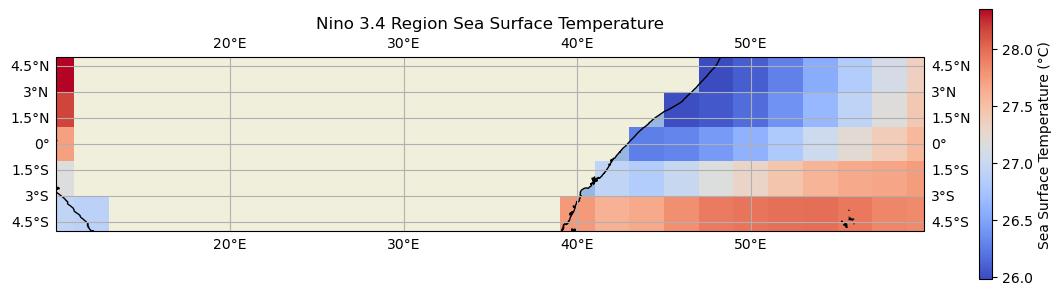

In [18]:
#2.2
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# 打开netCDF文件
dataset = nc.Dataset('NOAA_NCDC_ERSST_v3b_SST.nc')

# 读取纬度、经度变量
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

# 选择一个时间点的数据，例如第一个时间点
sst_variable = dataset.variables['sst']
sst_data = sst_variable[0, :, :]  # 选择第一个时间点的数据

# 尼诺3.4区域经纬度范围
nino_lons = [10, 60]
nino_lats = [-5, 5]

# 找到最接近尼诺3.4区域经纬度范围的索引
lon_idx = np.where((lons >= nino_lons[0]) & (lons <= nino_lons[1]))[0]
lat_idx = np.where((lats >= nino_lats[0]) & (lats <= nino_lats[1]))[0]

# 选择尼诺3.4区域的SST数据
sst_nino = sst_data[lat_idx[0]:lat_idx[-1]+1, lon_idx[0]:lon_idx[-1]+1]

# 选择尼诺3.4区域的经纬度
lons_nino = lons[lon_idx[0]:lon_idx[-1]+1]
lats_nino = lats[lat_idx[0]:lat_idx[-1]+1]

# 创建地图，使用PlateCarree投影
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  

# 给地图添加特征
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)

# 绘制尼诺3.4区域的SST数据
sst_plot = ax.pcolormesh(lons_nino, lats_nino, sst_nino, cmap='coolwarm', transform=ccrs.PlateCarree())

# 添加色标
cbar = plt.colorbar(sst_plot, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Sea Surface Temperature (°C)')

# 添加标题和其他标签
ax.set_title('Nino 3.4 Region Sea Surface Temperature')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# 设置地图显示范围为尼诺3.4区域
ax.set_extent(nino_lons + nino_lats, crs=ccrs.PlateCarree())

# 保存或显示图像
plt.show()

# 关闭netCDF文件
dataset.close()